In [0]:
# Demo of the Metropolis sampling algorithm, based on Iain Murray's MCMC tutorial at NIPS 2015

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

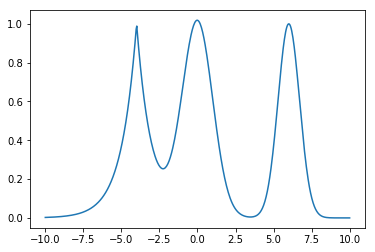

In [137]:
# log Z*p 
def log_p_tilde(x):
    # log-p-tilde
    log_p_tilde = np.log(np.exp(-0.5*x**2) 
                  + np.exp(- (x-6)**2) 
                  + np.exp(-np.abs(x+4)))
    return log_p_tilde




xx = np.linspace(-10,10,500)
plt.figure()
plt.plot(xx, np.exp(log_p_tilde(xx)))

In [138]:
# Metropolis algorithm
def metropolis(init_state, log_p_tilde, numIterations, step_size):
    
    D = init_state.shape[0] # dimensionality of the state space
    
    samples = np.zeros((D, numIterations))    
    state = init_state            # set initial state
    Lp_state = log_p_tilde(state) # evaluate \log\tilde p at current state

    count = 0                     # counts the number of acceptanced samples

    ##  Main Metropolis loop
    for i in range(numIterations):
        # Propose
        prop = np.random.normal(state.ravel(), step_size, state.shape) # proposed new sample: sample from Gaussian 
                                                                       # centered at current sample
        Lp_prop = log_p_tilde(prop); 
        # evaluate \log\tilde p at proposed sample
        if np.random.rand() < np.minimum(1, np.exp(Lp_prop - Lp_state)):              # IF acceptance criterion satisfied
#         if np.random.rand() < np.exp(Lp_prop - Lp_state):              # IF acceptance criterion satisfied

            # Accept
            state = prop                                # accept proposal as new state ...
            Lp_state = Lp_prop                          # ... and the corresponding evaluation
            count +=  1                                 # increase counter if accepted
        
        samples[:,i] = state                            # add state to sample set
        
    acceptance_rate = count/numIterations               # compute acceptance rate
    
    return samples, acceptance_rate

In [145]:
num_samples = 21000

# initial state
init_state = np.array([20]) # <------ EDIT

# stepsize
step_size = 2              # <------ EDIT

# Metropolis algorithm
samples, acceptance_rate = metropolis(init_state, log_p_tilde, num_samples, step_size)


Acceptance rate: 0.576


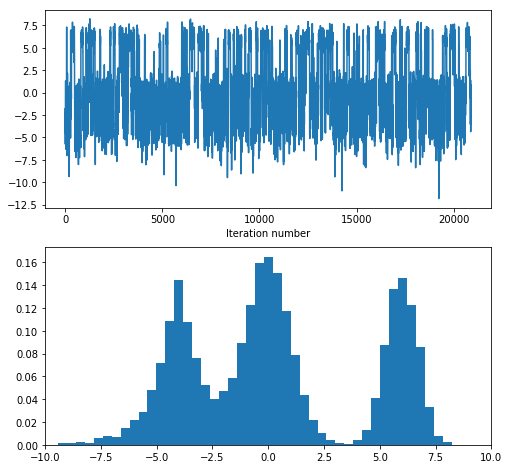

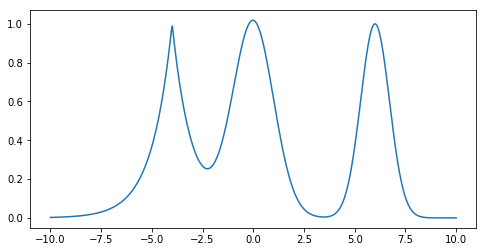

In [146]:
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(samples[:,100:].ravel())
plt.xlabel("Iteration number")

plt.subplot(212)
plt.hist(samples[:,100:].ravel(), 50, density=True)

plt.xlim([xx[0], xx[-1]])
print("Acceptance rate: " + str(acceptance_rate))
plt.figure(figsize=(8, 4))
plt.plot(xx, np.exp(log_p_tilde(xx)))
# plt.plot(xx, np.exp(sin_(xx)))

In [110]:
samples.shape

(1, 21000)

# Another example, not a distribution, an arbitrary function

In [ ]:
def log_p_tilde(x):
    # region of data point should be the same as the range of distribution
    if x[0] > 10 or x[0]< -10:  # x: []
        y = [0.01]
    else: 
        y = 0.1*np.abs(np.sin(x))
    return np.log(y)

xx = np.linspace(-10,10,500)
plt.figure()
plt.plot(xx, np.exp(log_p_tilde(xx)))

In [133]:
num_samples = 21000

# initial state
init_state = np.array([0]) # <------ EDIT

# stepsize
# generally, the larger the stepsize, the smaller the acceptance rate
step_size = 0.1              # <------ EDIT

# Metropolis algorithm
samples, acceptance_rate = metropolis(init_state, log_p_tilde, num_samples, step_size)

/vol/bitbucket/nuric/pypi/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


Acceptance rate: 0.9672857142857143


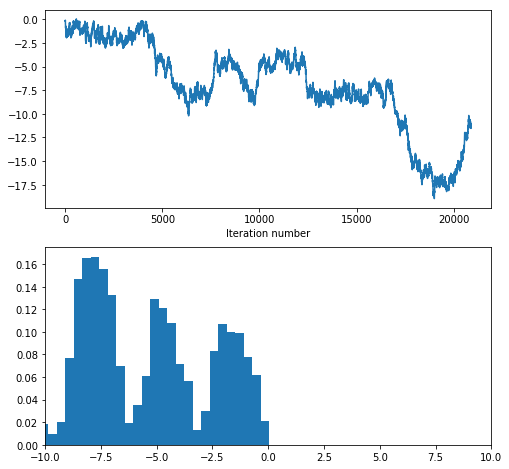

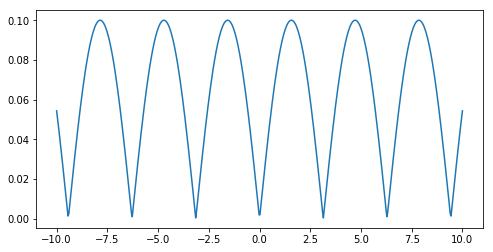

In [134]:

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(samples[:,100:].ravel())
plt.xlabel("Iteration number")

plt.subplot(212)
plt.hist(samples[:,100:].ravel(), 50, density=True)

plt.xlim([xx[0], xx[-1]])
print("Acceptance rate: " + str(acceptance_rate))
plt.figure(figsize=(8, 4))
plt.plot(xx, np.exp(log_p_tilde(xx)))
